In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [3]:
caldata = pd.read_csv("data/PIC2_R76_calib.txt", skiprows=1, engine='python', names=['eVt','eVee'], \
                         delim_whitespace=False)
print (caldata.head(10))

        eVt     eVee
0    0.1857  -0.0349
1  147.8310  13.9621
2  165.0393  17.7626


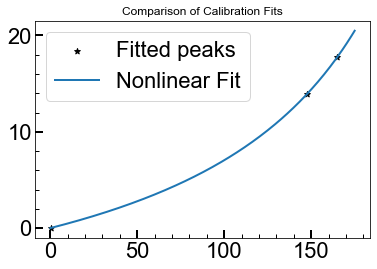

In [12]:
import lmfit as lf

#Points found using gaussian fits to peaks, to be used for calibration.
#x: PTOFamps values
#y: known emission lines (keV)
gcal = []
gcal.append(np.asarray(caldata['eVt']))
gcal.append(np.asarray(caldata['eVee']))
#gcal = [[0,1.73263e-07,2.19449e-07,6.72661e-07],[0,13.95,17.74,59.54]]
plt.scatter(gcal[0],gcal[1],marker="*",color='k',label="Fitted peaks")

def cal(x,a=1,b=1):
    return a*x/(b-x)

calmod = lf.Model(cal)
calparams = calmod.make_params()
calparams.add('a',value=1,min=0)
calparams.add('b',value=300,min=200) #Start large to give it a push in the right direction
calfit = calmod.fit(gcal[1],calparams,x=gcal[0])

en = np.linspace(0,175,200)
plt.plot(en,cal(en,a=13.27,b=288.34),label="Nonlinear Fit")
#plt.plot(gcal[0],13.95*np.asarray(gcal[0])/1.73263e-07,linestyle='--',label="Linear Fit")

#plt.text(0,-10,"*And a fixed point at (0,0).")

plt.title("Comparison of Calibration Fits")
plt.legend()
plt.show()

calfit